In [32]:
import pandas as pd
import sqlite3

db_file_path = r'C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\cars1.db'
conn = sqlite3.connect(db_file_path)


df_cars = pd.read_sql_query("select * from car_listings", conn)

print("Cars DataFrame:")
print(df_cars.head())

conn.close()

Cars DataFrame:
        brand             model     price               seller  \
0         BMW    428 Gran Coupe  18 000 €  Privatus pardavėjas   
1         BMW               530  26 900 €  Privatus pardavėjas   
2  Volkswagen              Golf   7 100 €  Privatus pardavėjas   
3        Fiat              500X  10 500 €  Privatus pardavėjas   
4         BMW  320 Gran Turismo  14 500 €  Privatus pardavėjas   

             location         phone registration_year     mileage  \
0   Klaipėda, Lietuva  +37068744028              2015  199 000 km   
1   Klaipėda, Lietuva  +37067780732              2019   46 000 km   
2     Alytus, Lietuva  +37068875994           2014-03  314 086 km   
3     Kaunas, Lietuva  +37068731000              2016  126 211 km   
4  Kėdainiai, Lietuva  +37064227171           2016-06  162 000 km   

                     engine         fuel_type                body_type doors  \
0  1997 cm³, 245 AG (180kW)          Benzinas             Kupė (Coupe)   4/5   
1  1998 cm³,

In [33]:
import numpy as np
df_cars['mileage_clean'] = df_cars['mileage'].str.replace(' km', '').str.replace(' ', '')
df_cars['mileage_clean'] = pd.to_numeric(df_cars['mileage_clean'], errors='coerce').astype(float)
df_cars['price_clean'] = df_cars['price'].str.replace(' €', '').str.replace(' ', '').astype(float)

demo = df_cars[['mileage_clean', 'price_clean']]
demo.dropna(inplace=True)
demo['mileage_clean'] = np.ceil(demo['mileage_clean'].values/5000.0)*5000.0
demogr = demo.groupby('mileage_clean').mean(numeric_only=True).reset_index()
demogr.head(10)
demo.info

C:\Users\Batia\AppData\Local\Temp\ipykernel_19588\4160976403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo.dropna(inplace=True)
C:\Users\Batia\AppData\Local\Temp\ipykernel_19588\4160976403.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['mileage_clean'] = np.ceil(demo['mileage_clean'].values/5000.0)*5000.0


<bound method DataFrame.info of       mileage_clean  price_clean
0          200000.0      18000.0
1           50000.0      26900.0
2          315000.0       7100.0
3          130000.0      10500.0
4          165000.0      14500.0
...             ...          ...
6188       195000.0       2850.0
6189        90000.0       2850.0
6190       325000.0       2850.0
6191       290000.0       2890.0
6192       155000.0       2895.0

[6146 rows x 2 columns]>

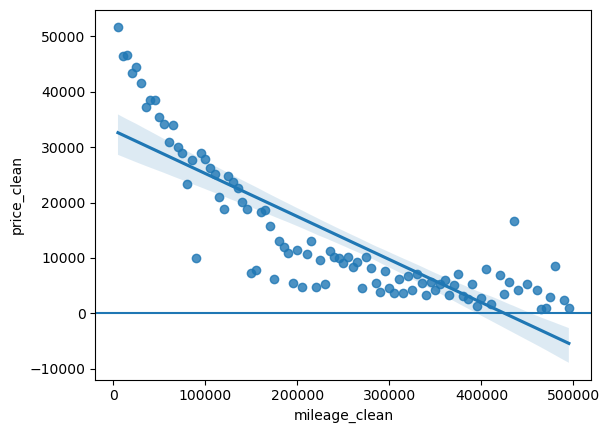

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
DM2 = demogr.query(expr='mileage_clean < 500000')
ax = sns.regplot(x='mileage_clean', y='price_clean', data=DM2, order=1)
ax.axhline(y=0)
plt.show()

In [25]:
import numpy.polynomial.polynomial as poly

coef = poly.polyfit(DM2['mileage_clean'], DM2['price_clean'], deg=1)
print(coef)

[ 3.30023852e+04 -7.76362484e-02]


In [29]:
fn_fit = poly.Polynomial(coef)

In [30]:
fn_fit

Polynomial([ 3.30023852e+04, -7.76362484e-02], domain=[-1,  1], window=[-1,  1], symbol='x')

In [31]:
r = 300000
t_price = fn_fit(r)
print(t_price)

9711.510682910626


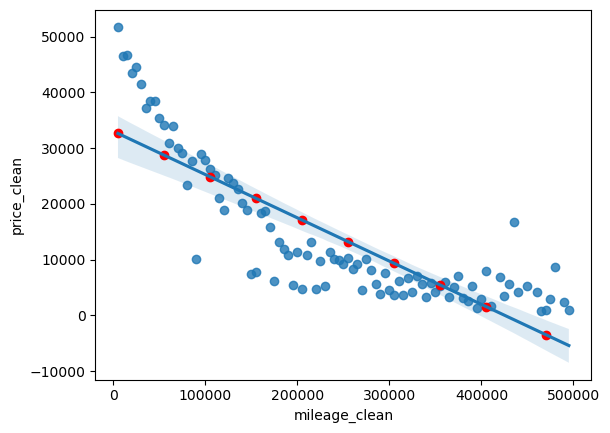

In [48]:
kainos_fitted = fn_fit(DM2['mileage_clean'])
DM2['price_fitted'] = kainos_fitted

ax = sns.regplot(x='mileage_clean', y='price_clean', data=DM2, order=1)
ax.scatter(DM2['mileage_clean'][::10], DM2['price_fitted'][::10], color='red')

plt.show()

In [52]:
fn_fit(300000)

5924.967255883588

[-8.31762917e-13  9.35697419e-07 -3.56439801e-01  5.11017386e+04]


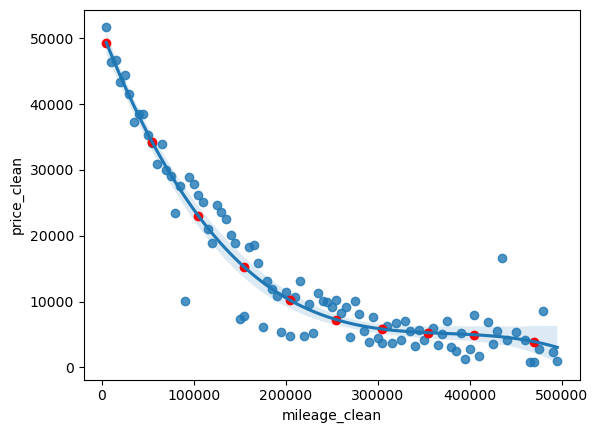

In [51]:
coef = np.polyfit(x=DM2['mileage_clean'], y=DM2['price_clean'], deg=3)
print(coef)
fn_fit = poly.Polynomial(coef[::-1])
kainos_fitted = fn_fit(DM2['mileage_clean'])
DM2['K_fit'] = kainos_fitted

ax = sns.regplot(data=DM2, x='mileage_clean', y='price_clean', order=3)
ax.scatter(x=DM2['mileage_clean'][::10], y=DM2['K_fit'][::10], c='red')

plt.show()

In [ ]:
df['mileage_clean'] = df['mileage'].str.replace(' km', '').str.replace(' ', '').astype(float)